# Visualization of categorical variables 

In [3]:
import pandas as pd                               #import the required libraries

In [5]:
df = pd.read_csv('data/vehicles_dataset_upd.csv') #read the data from the dataset
                                                  
df.head()                                         #and display the first 5 rows

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


In [7]:
stats = df.groupby(['year', 'price_category']).agg({'fuel': 'first', #group by two columns and aggregate by 
                    'odometer': 'mean'}) #columns of different types. This will be the first value in 
                                         #the fuel type and the average value from the odometer
stats = stats.rename(columns={'fuel': 'fuel_first', 'odometer': 'odometer_mean'})#rename the column names 
                                                                                #to make it clear
stats

fuel_first  odometer_mean
year price_category                          
1995 high                  gas   57305.753086
     low                   gas  105530.054187
     medium                gas   69436.685315
1996 high                other  153710.000000
     low                   gas  136428.187500
...                        ...            ...
2021 high                  gas    2459.433333
     low                 other   29316.900000
     medium                gas   49381.875000
2022 high                  gas  142002.500000
     low                   gas  180000.000000

[82 rows x 2 columns]

In [8]:
stats = df.groupby(['fuel'], as_index=False)[['id']].count()#group the values by fuel and label it 
                                                 #as a regular column, not an index as_index=False
                                                 #[['id']].count() - #so let's count the number of objects
stats = stats.rename(columns={'id': 'count'})
stats

,fuel,count
0,diesel,643
1,electric,44
2,gas,8298
3,hybrid,104
4,other,779


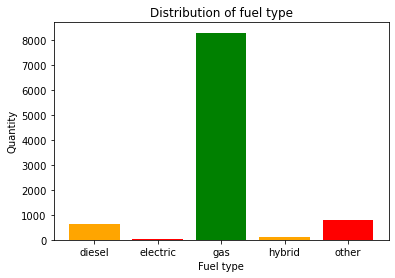

In [10]:
import matplotlib.pyplot as plt

plt.bar(stats['fuel'], stats['count'], color=['orange', 'red', 'green'])
plt.xlabel('Fuel type')#Тип топлива
plt.ylabel('Quantity')#Количество
plt.title('Distribution of fuel type');#Распределение типа топлива

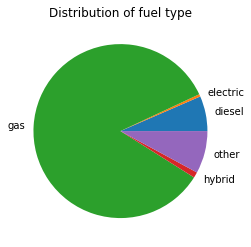

In [11]:
plt.pie(stats['count'], labels=stats['fuel'])
plt.title("Distribution of fuel type")#Распределение типа топлива
plt.show();

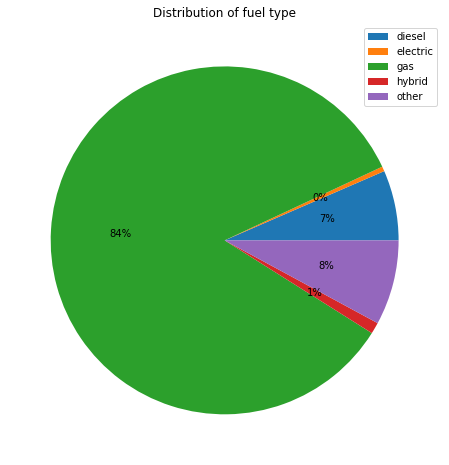

In [12]:
plt.figure(figsize=(12, 8))
plt.pie(stats['count'], labels=stats['fuel'], labeldistance=None, autopct = '%1.0f%%')
plt.title("Distribution of fuel type")#Распределение типа топлива
plt.legend()
plt.show();